## Import

In [ ]:
import pandas as pd
import json 
import datetime as dt
import requests
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import seaborn as sns
import xgboost as xgb 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/BI Team/BI Projects/OKRs- Cường/churn_project/HAN_churn_train.csv')

In [ ]:
df.head()

,order,active_day,stop,active_week,total_fee,total_discount,total_bonus_account,order_discount,cancel_order,1.0,2.0,3.0,4.0,5.0,source,category_1,category_2,week0_order,week1_order,week2_order,week3_order,week4_order,week5_order,week6_order,week7_order,recency,label,n_category_1,n_source,n_category_2
0,1,1,1,1,27000.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,Organic,Small business,Fashion & Sport,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,0,2,1,1
1,10,8,10,5,327000.0,15000.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,Direct Sale,Small business,Food & Drink,1.0,1.0,0.0,2.0,3.0,2.0,1.0,0.0,13,0,2,0,2
2,1,1,1,1,54000.0,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Direct Sale,Small business,Mother & Baby,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,0,2,0,6
3,8,6,8,4,370000.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,Organic,Small business,Electronics,2.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0,1,2,1,0
4,28,16,28,6,710000.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,12.0,Organic,Individual,Individual,4.0,8.0,5.0,2.0,7.0,1.0,1.0,0.0,13,1,1,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 31 columns):
main_id                27584 non-null int64
order                  27584 non-null int64
active_day             27584 non-null int64
stop                   27584 non-null int64
active_week            27584 non-null int64
total_fee              27584 non-null float64
total_discount         27584 non-null float64
total_bonus_account    27584 non-null float64
order_discount         27584 non-null float64
cancel_order           27584 non-null float64
1.0                    27584 non-null float64
2.0                    27584 non-null float64
3.0                    27584 non-null float64
4.0                    27584 non-null float64
5.0                    27584 non-null float64
source                 27584 non-null object
category_1             27584 non-null object
category_2             27584 non-null object
week0_order            27584 non-null float64
week1_order            27584 n

## EDA

In [ ]:
df.describe()

,order,active_day,stop,active_week,total_fee,total_discount,total_bonus_account,order_discount,cancel_order,1.0,2.0,3.0,4.0,5.0,week0_order,week1_order,week2_order,week3_order,week4_order,week5_order,week6_order,week7_order,recency,label,n_category_1,n_source,n_category_2
count,27584.000000,27584.000000,27584.000000,27584.000000,2.758400e+04,2.758400e+04,2.758400e+04,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.00000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000
mean,12.687609,6.886275,14.258338,3.394033,4.710500e+05,2.490690e+04,4.577146e+02,3.602378,3.857816,0.017075,0.002211,0.005220,0.013559,3.63526,0.987602,2.059419,1.645410,1.646317,1.620795,1.655090,1.543975,1.529002,24.581424,0.316923,1.443772,0.818119,3.872281
std,144.018911,8.220073,145.263989,2.364665,5.398838e+06,8.078416e+04,1.191321e+04,10.760511,42.551166,0.145627,0.049966,0.077401,0.139000,10.18699,0.870795,11.307682,13.376164,16.333644,21.614677,30.245364,24.746610,27.856869,19.945438,0.465286,0.563445,0.385753,1.873332
min,1.000000,1.000000,1.000000,1.000000,5.000000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,5.400000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,2.000000
50%,4.000000,3.000000,4.000000,3.000000,1.410000e+05,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.000000,1.000000,5.000000
75%,12.000000,9.000000,13.000000,5.000000,4.197000e+05,1.700000e+04,0.000000e+00,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,5.000000
max,23573.000000,50.000000,23576.000000,8.000000,8.821510e+08,4.354000e+06,1.200000e+06,422.000000,6938.000000,4.000000,2.000000,3.000000,6.000000,298.00000,43.000000,1716.000000,2101.000000,2621.000000,3524.000000,4975.000000,4048.000000,4573.000000,50.000000,1.000000,2.000000,1.000000,8.000000


In [ ]:
# drop feature 

In [ ]:
df1=df.drop(columns={'source','category_1','category_2','main_id'})

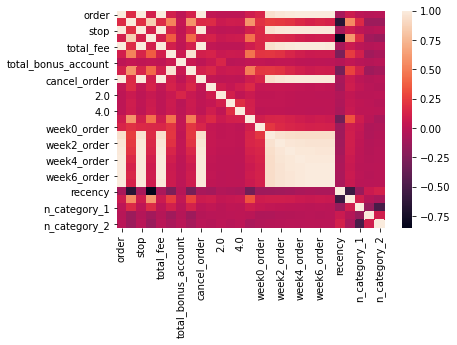

In [ ]:
sns.heatmap(df1.corr())

## Clean data

In [ ]:
df2=df1.copy()

In [ ]:
# clean outlier
for i in df2.columns:
    df2=df2[df2[i]<=df2[i].quantile(.997)]
    df2=df2[df2[i]>=df2[i].quantile(.02)]

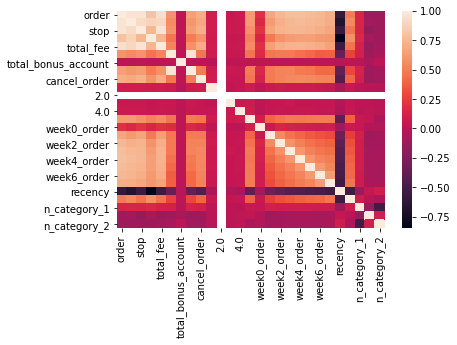

In [ ]:
sns.heatmap(df2.corr())

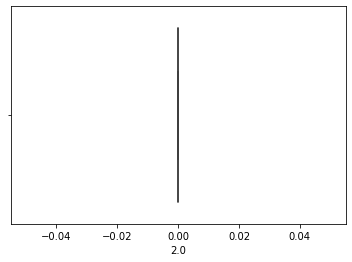

In [ ]:
sns.boxplot(df2['2.0'])

In [ ]:
# drop feature "2.0"
df3=df2.drop(columns={'2.0'})

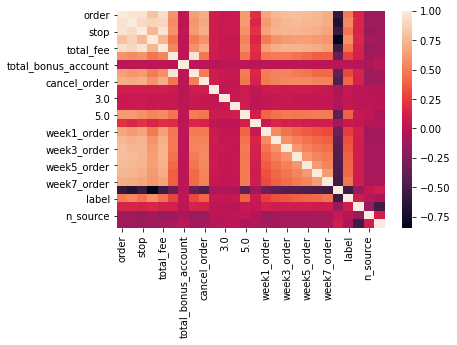

In [ ]:
sns.heatmap(df3.corr())

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefbb635f60>,
      dtype=object)

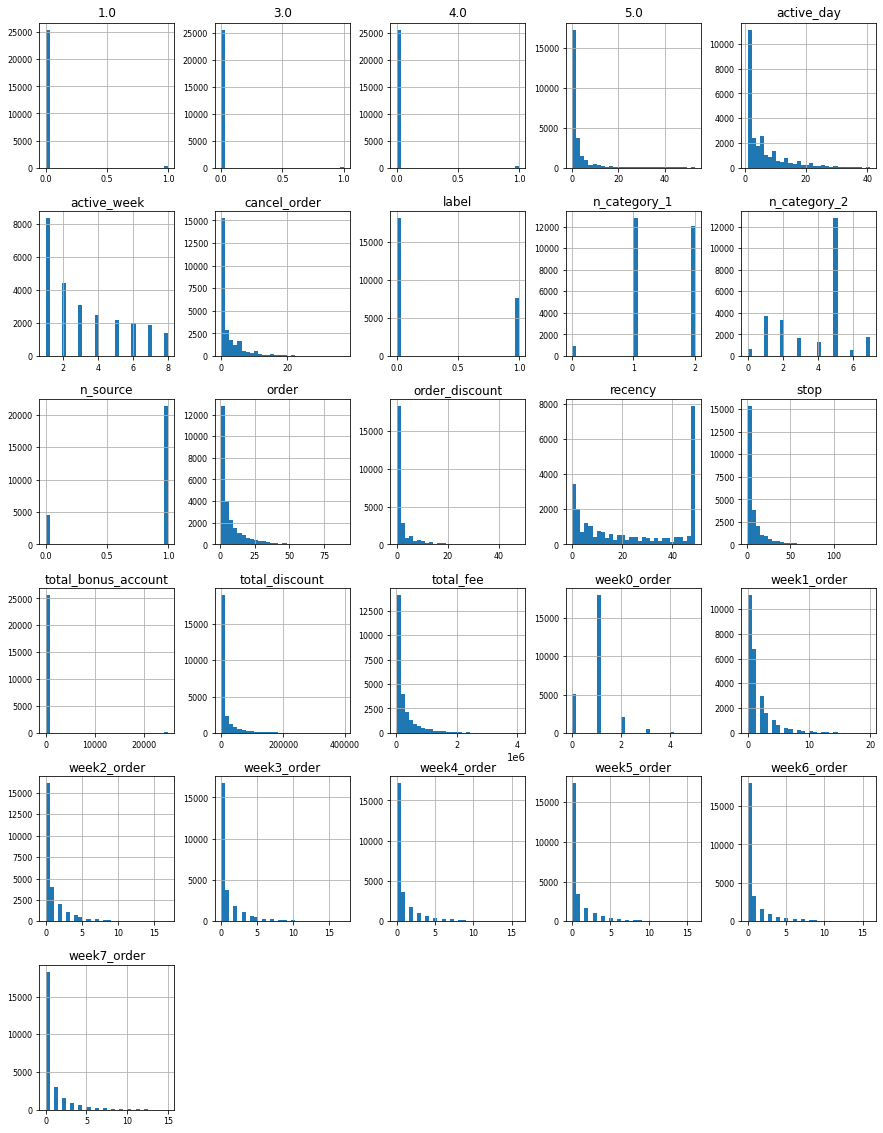

In [ ]:
df3.hist(figsize=(15, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [ ]:
data=df3[['order','label']].groupby('label').count().reset_index().rename(columns={'order':'user'})

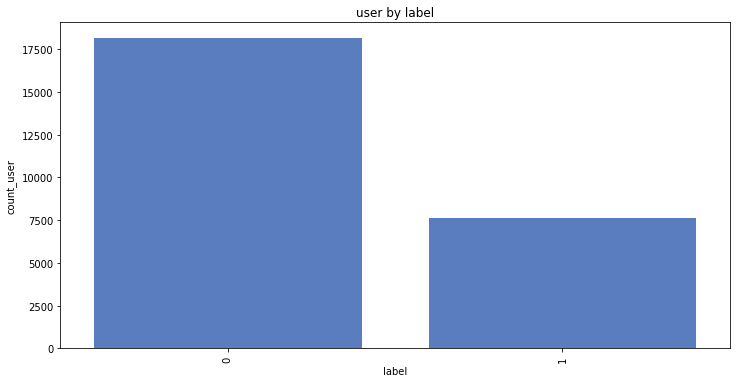

In [ ]:
f, ax =plt.subplots(figsize=(12,6))
sns.set_color_codes("muted")
sns.barplot(data=data,x="label",y="user",color="b")
ax.set_xticklabels(labels=data.label,rotation='90')
ax.set(xlabel="label",ylabel="count_user")
plt.title("user by label")
plt.show()

#### Với data 1 năm có khoảng 27k user và có 9k user có lên đơn vào tuần đầu tiên sau khi sang happiness chiếm khoảng 30%


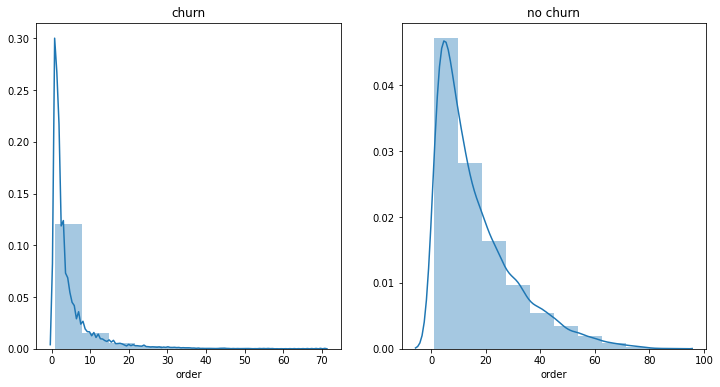

In [ ]:
f, ax=plt.subplots(1,2,figsize=(12,6))
ax1=ax[0]
sns.distplot(df3[df3.label==0].order,bins=10,ax=ax1)
ax2=ax[1] 
sns.distplot(df3[df3.label==1].order,bins=10,ax=ax2)
ax1.title.set_text('churn')
ax2.title.set_text('no churn')

#### Lượng đơn trong 50 ngày đầu của từng nhóm có sự khác biệt khá rõ ràng. Khi nhóm churn sẽ chủ yếu tập trung vào từ 1-10 đơn. Còn nhóm No churn sẽ tập trung vào từ 10-30 đơn

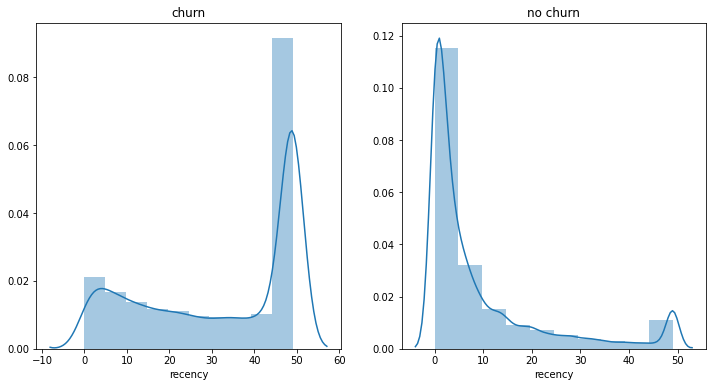

In [ ]:
f, ax=plt.subplots(1,2,figsize=(12,6))
ax1=ax[0]
sns.distplot(df3[df3.label==0].recency,bins=10,ax=ax1)
ax2=ax[1] 
sns.distplot(df3[df3.label==1].recency,bins=10,ax=ax2)
ax1.title.set_text('churn')
ax2.title.set_text('no churn')

#### Đối với recency ( số ngày từ ngày cuối cùng lên đơn -> user đó bước sang Happiness) . Recency của nhóm No churn cũng khác biệt rõ ràng với nhóm Churn

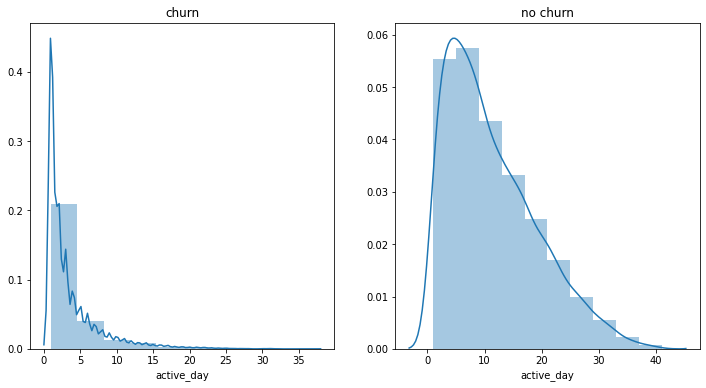

In [ ]:
f, ax=plt.subplots(1,2,figsize=(12,6))
ax1=ax[0]
sns.distplot(df3[df3.label==0].active_day,bins=10,ax=ax1)
ax2=ax[1] 
sns.distplot(df3[df3.label==1].active_day,bins=10,ax=ax2)
ax1.title.set_text('churn')
ax2.title.set_text('no churn')

#### Số ngày active của nhóm Churn thấp hơn nhóm No churn rất nhiều. Khi nhóm No churn tập trung 10-20 ngày thì nhóm Churn tập trung vào 1-5 ngày mà thôi


In [ ]:
df3.groupby('label').agg({'label':'count'})

,label
label,
0,18165
1,7624


## Split data into train and test sets

In [ ]:
# split data into X and y
X = df3.drop(columns={'label'})
Y = df3['label']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)



## Model selection

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))


In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.755202
1  SVC  0.775365
2   LR  0.807160
3   DT  0.753134
4  GNB  0.775236
5   RF  0.819827
6   GB  0.819181


## Features selection

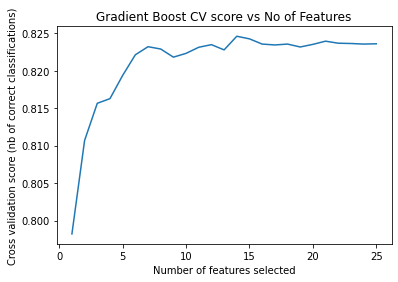

In [ ]:
from sklearn.feature_selection import RFECV
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=5, scoring='accuracy')
gb_rfecv.fit(X, Y)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [ ]:
feature_names=X.columns.tolist()

In [ ]:
logreg_model = GradientBoostingClassifier()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, Y)
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['order', 'active_day', 'stop', 'active_week', 'total_fee', 'total_discount', 'cancel_order', '5.0', 'week1_order', 'week5_order', 'week6_order', 'week7_order', 'recency', 'n_source']


In [ ]:
len(new_features)

14

#### Giảm từ 25 feature xuống 15 feature quan trọng để đưa vào model 

In [ ]:
# new feature 

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7581611644503364

In [ ]:
X = df3[new_features]
Y = df3['label']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)


# gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

print("Accuracy score")
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix:
[[4948  475]
 [ 911 1403]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5423
           1       0.75      0.61      0.67      2314

    accuracy                           0.82      7737
   macro avg       0.80      0.76      0.77      7737
weighted avg       0.82      0.82      0.82      7737

Accuracy score
Accuracy: 82.09%


## Save model

In [ ]:
pickle.dump(gb_clf, open("churn.pkl", "wb"))